###  Libraries

In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_kernels
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from tslearn.clustering import KernelKMeans as TSKernelKMeans
from KernelKMeans import KernelKMeans
from Rings import Rings
from Common_Modules.Evaluation import Evaluator

c:\Users\PAPASOFT INC\AppData\Local\Programs\Python\Python311\Lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


### Global Variables

In [2]:
seed = 42
evaluator = Evaluator()

### Load Dataset

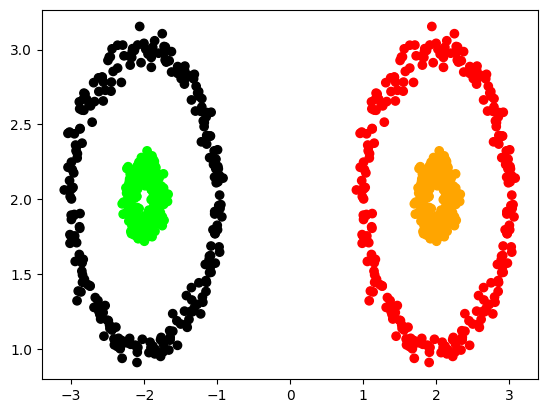

In [3]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'black', 'cyan', 'gray', 'lime']

# Generate 5 pairs of data with specified center positions and unique IDs for each ring
centers_coordinates = [(2, 2), (-2, 2)]  # Specify center positions for each pair

rings = Rings()

X, y = rings.make_rings_pairs(centers_coordinates=centers_coordinates, n_samples=500, factor=0.2, noise=0.05)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(colors))

In [4]:
K = 4
kernel_matrix = pairwise_kernels(X, X, metric='rbf', gamma=3)

### kMeans

ACC: 0.60 PUR: 0.60 NMI: 0.57 ARI: 0.42


c:\Users\PAPASOFT INC\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikit_learn-1.3.1-py3.11-win-amd64.egg\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


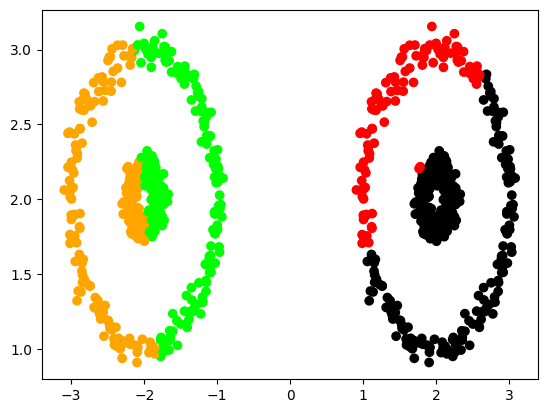

In [5]:
kmeans = KMeans(n_clusters=K).fit(X)
acc, pur, nmi, ari = evaluator.evaluate_model(y, kmeans.labels_)
evaluator.print_evaluation()
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap=ListedColormap(colors))

### Kernel kMeans

c:\Users\PAPASOFT INC\AppData\Local\Programs\Python\Python311\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 1000 1-dimensional timeseries
  warnings.warn(


ACC: 0.69 PUR: 0.75 NMI: 0.67 ARI: 0.58


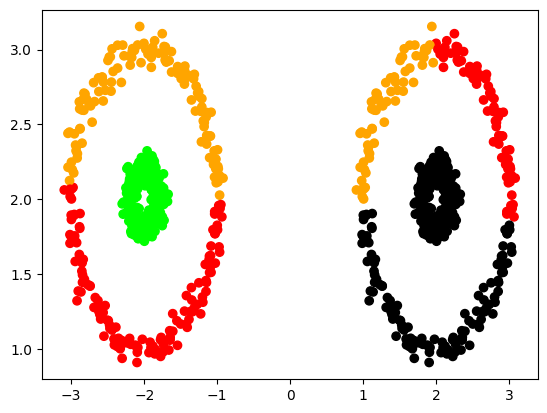

In [6]:
# Should find a way to init the fucking centers!
kernel_kmeans = TSKernelKMeans(n_clusters=K, n_init=10, kernel='precomputed').fit(kernel_matrix)
acc, pur, nmi, ari = evaluator.evaluate_model(y, kernel_kmeans.labels_)
evaluator.print_evaluation()
plt.scatter(X[:, 0], X[:, 1], c=kernel_kmeans.labels_, cmap=ListedColormap(colors))
plt.show()

### Kernel kMeans++

Executing Kerenl k-Means++ Initialization
Iter: 0 Cl L: 628.4095
Iter: 1 Cl L: 616.0268
Iter: 2 Cl L: 597.7181
Finished in Iter: 3 Cl L: 595.4403
Executing Kerenl k-Means++ Initialization
Iter: 0 Cl L: 634.0290
Iter: 1 Cl L: 625.5406
Iter: 2 Cl L: 613.7031
Iter: 3 Cl L: 595.8504
Iter: 4 Cl L: 566.0797
Iter: 5 Cl L: 539.3209
Iter: 6 Cl L: 526.5009
Finished in Iter: 7 Cl L: 525.7380
Executing Kerenl k-Means++ Initialization
Iter: 0 Cl L: 647.6310
Iter: 1 Cl L: 639.7722
Iter: 2 Cl L: 632.1417
Iter: 3 Cl L: 622.8790
Iter: 4 Cl L: 609.4514
Iter: 5 Cl L: 595.6903
Iter: 6 Cl L: 595.6060
Finished in Iter: 7 Cl L: 595.5902
Executing Kerenl k-Means++ Initialization
Iter: 0 Cl L: 643.6577
Iter: 1 Cl L: 636.1267
Iter: 2 Cl L: 627.7539
Iter: 3 Cl L: 617.0492
Iter: 4 Cl L: 600.2093
Finished in Iter: 5 Cl L: 595.9313
Executing Kerenl k-Means++ Initialization
Iter: 0 Cl L: 642.9026
Iter: 1 Cl L: 636.1059
Iter: 2 Cl L: 628.2647
Iter: 3 Cl L: 618.5027
Iter: 4 Cl L: 602.2153
Iter: 5 Cl L: 595.7989
Iter: 

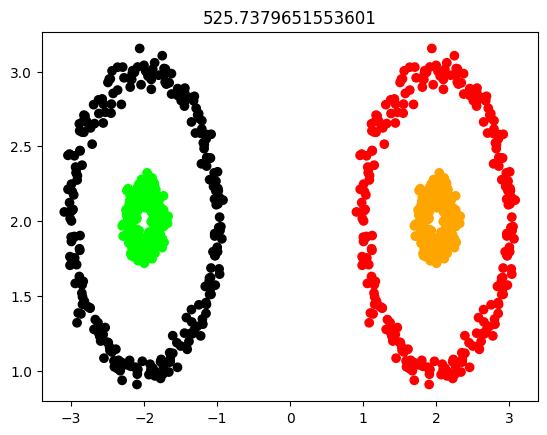

In [8]:
kernelKMeans =  KernelKMeans()
min_total_error, best_partition = kernelKMeans.kernel_kmeans(X, K, kernel_matrix, n_init=10, method='k-means++')
plt.scatter(X[:, 0], X[:, 1], c=best_partition, cmap=ListedColormap(colors))
plt.title(min_total_error)
plt.show()